## Project Goal
This project explores how demographic and financial factors are related to credit risk indicators in the German Credit dataset.

## Key Questions
1. How does credit amount vary by savings level?
2. Does employment type (job level) relate to loan size?
3. Are certain loan purposes associated with higher credit amounts?
4. Does age affect loan duration?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [9]:
df['Saving accounts'] = df['Saving accounts'].fillna('No Account')
df['Checking account'] = df['Checking account'].fillna('No Account')

In [10]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,No Account,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,No Account,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


The effect of the credit amount on saving accounts

In [12]:
df.groupby('Saving accounts')['Credit amount'].mean().sort_values()

Saving accounts
quite rich    2572.111111
rich          2573.395833
little        3187.832504
moderate      3384.038835
No Account    3906.409836
Name: Credit amount, dtype: float64

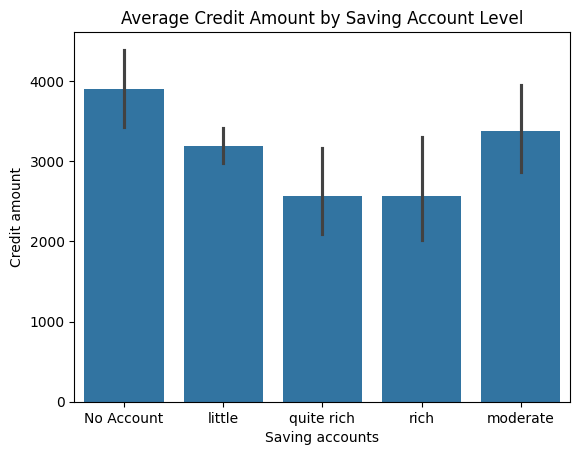

In [13]:
sns.barplot(
    x='Saving accounts',
    y='Credit amount',
    data=df,
    estimator=np.mean
)
plt.title('Average Credit Amount by Saving Account Level')
plt.show()


### Insight
Clients with moderate or no savings tend to have higher average credit amounts, which may indicate higher repayment risk due to limited financial buffers.


Effect of job level in loan size

In [15]:
df.groupby('Job')['Credit amount'].mean().sort_values()

Job
1    2358.520000
0    2745.136364
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

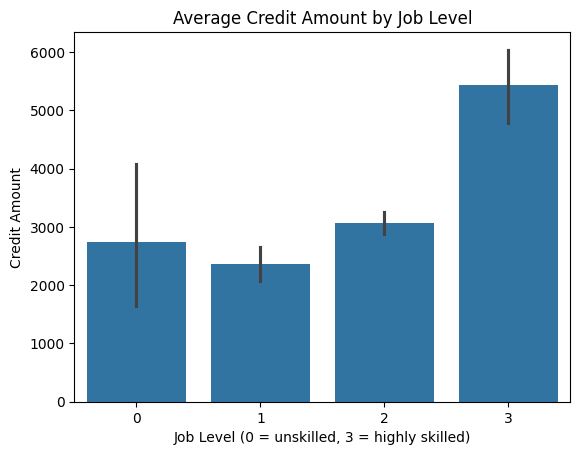

In [19]:
sns.barplot(
    x='Job',
    y='Credit amount',
    data=df,
    estimator=np.mean
)
plt.title('Average Credit Amount by Job Level')
plt.xlabel('Job Level (0 = unskilled, 3 = highly skilled)')
plt.ylabel('Credit Amount')
plt.show()


### Insight
Clients with higher job levels tend to receive higher credit amounts, suggesting that employment stability increases borrowing capacity and lender trust.

IS the loan duration effected by age?

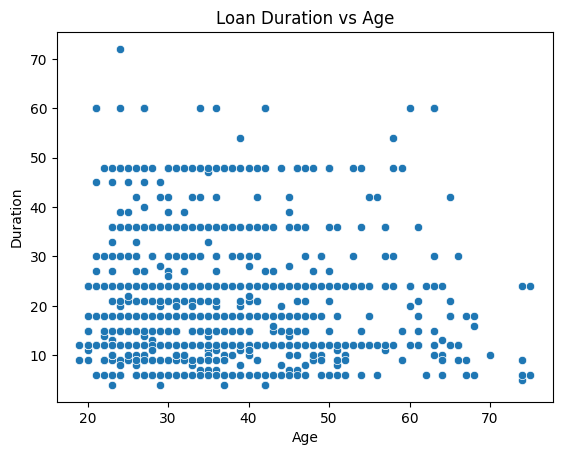

In [20]:
sns.scatterplot(x='Age', y='Duration', data=df)
plt.title('Loan Duration vs Age')
plt.show()


### Insight
There is no strong relationship between age and loan duration, indicating that lenders prioritize financial factors over age when determining loan terms.
